In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
import scraper
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv("final_dataset_clean.csv")

C:\Users\sjkov\AppData\Local\Temp\ipykernel_21032\3805504656.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_dataset_clean.csv")


In [18]:
counts = df['answer'].value_counts()

top_400 = counts.head(400)
print(top_400)

answer
Australia              513
China                  482
Chicago                474
Japan                  469
France                 460
                      ... 
Einstein                82
Jane Austen             82
Uranus                  82
Shakespeare             82
F. Scott Fitzgerald     82
Name: count, Length: 400, dtype: int64


In [22]:
top_400_list = df['answer'].value_counts().head(400).index.tolist()

print("Top 400 list contains: " + str(top_400_list))

df_filtered = df[df['answer'].isin(top_400_list)].copy()

print("\nTotal entries: "+ str(len(df_filtered)))

Top 400 list contains: ['Australia', 'China', 'Chicago', 'Japan', 'France', 'India', 'Spain', 'California', 'Mexico', 'Alaska', 'Canada', 'Hawaii', 'Italy', 'Florida', 'Texas', 'Brazil', 'Ireland', 'New York', 'Paris', 'Egypt', 'Greece', 'South Africa', 'Germany', 'Sweden', 'London', 'Boston', 'Russia', 'Switzerland', 'San Francisco', 'New Orleans', 'Philadelphia', 'Virginia', 'Georgia', 'Norway', 'Napoleon', 'Maine', 'Massachusetts', 'Portugal', 'Cuba', 'New Zealand', 'George Washington', 'Venice', 'Denmark', 'Rome', 'Louisiana', 'Mars', 'Poland', 'Michigan', 'Washington', 'Scotland', 'Pennsylvania', 'Israel', 'Abraham Lincoln', 'Belgium', 'Julius Caesar', 'Thomas Jefferson', 'Africa', 'Antarctica', 'Ronald Reagan', 'Venus', 'the Netherlands', 'Cleopatra', 'Colorado', 'Iceland', 'Hamlet', 'Oklahoma', 'the Philippines', 'Argentina', 'Indonesia', 'New Jersey', '3', 'Atlanta', 'Richard Nixon', 'Athens', 'Minnesota', 'Henry VIII', 'New Mexico', 'North Carolina', 'Iran', 'Vienna', 'Berlin'

In [15]:
#now compare 20th vs. 21st century percentages
total_rows = len(df_filtered)

df_filtered['airdate'] = df_filtered['airdate'].astype(str)
count_20th = len(df_filtered[df_filtered['airdate'].str.startswith('1')])
count_21st = len(df_filtered[df_filtered['airdate'].str.startswith('2')])

print("Out of the filtered dataframe, " +str(count_20th) + " questions were from the 20th century and "+str(count_21st) + " questions were from the 21st century.")
pct1 = (count_20th/total_rows)*100
pct2 = (count_21st/total_rows)*100
pct1 = round(pct1, 2)
pct2 = round(pct2, 2)

print("This indicates a "+ str(pct1)+ "% "+str(pct2) +"% split")

Out of the filtered dataframe, 24655 questions were from the 20th century and 32997 questions were from the 21st century
This indicates a 42.77% 57.23% split


In [31]:
count_80s = len(df_filtered[df_filtered['airdate'].str.startswith('198')])
count_90s = len(df_filtered[df_filtered['airdate'].str.startswith('199')])
count_2000s = len(df_filtered[df_filtered['airdate'].str.startswith('200')])
count_2010s = len(df_filtered[df_filtered['airdate'].str.startswith('201')])
count_2020s = len(df_filtered[df_filtered['airdate'].str.startswith('202')])

print("80s total: "+ str(count_80s))
print("90s total: "+ str(count_90s))
print("2000s total: "+ str(count_2000s))
print("2010s total: "+ str(count_2010s))
print("2020s total: "+ str(count_2020s))

pct_80 = (count_80s/total_rows)*100
pct_90 = (count_90s/total_rows)*100
pct_2000s = (count_2000s/total_rows)*100
pct_2010s = (count_2010s/total_rows)*100
pct_2020s = (count_2020s/total_rows)*100

print("\n80s: "+ str(round(pct_80,2 )) + "%")
print("90s: "+ str(round(pct_90,2 )) + "%")
print("2000s: "+ str(round(pct_2000s,2 )) + "%")
print("2010s: "+ str(round(pct_2010s,2 )) + "%")
print("2020s: "+ str(round(pct_2020s,2 )) + "%")

80s total: 6932
90s total: 17723
2000s total: 15102
2010s total: 12061
2020s total: 5834

80s: 12.02%
90s: 30.74%
2000s: 26.2%
2010s: 20.92%
2020s: 10.12%


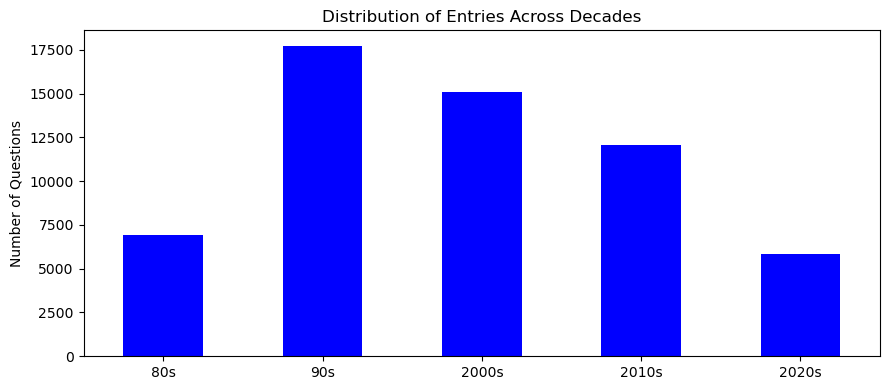

In [38]:
decades_counts = pd.Series(
    [count_80s, count_90s, count_2000s, count_2010s, count_2020s],
    index=['80s', '90s', '2000s', '2010s', '2020s']
)

plt.figure(figsize=(9, 4))
decades_counts.plot(kind='bar', color='blue')

plt.title('Distribution of Entries Across Decades')
plt.ylabel('Number of Questions')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()